# Milestone 2
### Rob Lisy

Prepare a dataset to be used later in building your first machine learning classification model. This dataset initially should meet the following criteria:

- Categorical and numerical attribute types (Mixed)
- Missing data
- Downloadable data file
- Column heading information

Of these data sets I'm chosing to use the [Adult income data set](https://archive.ics.uci.edu/ml/datasets/Adult)

### Requirements:
- Read in the data from a freely available source on the internet.  
- Account for outlier values in numeric columns (at least 1 column).
- Replace missing numeric data (at least 1 column).
- Normalize numeric values (at least 1 column, but be consistent with numeric data).
- Bin numeric variables (at least 1 column).
- Consolidate categorical data (at least 1 column).
- One-hot encode categorical data with at least 3 categories (at least 1 column).
- Remove obsolete columns.

In [ ]:
import pandas as pd
import numpy as np
import requests
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

filename = f"data/adult.csv"

# We're going to import the thyroid data set from UCI
# https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease
def download_if_not_exists(URL: str, filename: str):
    """
    Helper function to download the file at the URL if it doesn't already exist
    :param URL: A string with the URL location
    :param filename: The file name on disk
    """
    
    if path.exists(f"{filename}"):
        return
    else:
        req = requests.get(URL)
        url_content = req.content
        csv_file = open(f"{filename}", 'wb')
        csv_file.write(url_content)
        csv_file.close()
    return

download_if_not_exists("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                      filename)
                        
# import the CSV as a data set
df = pd.read_csv(filename, header=None)
df.head()
df.shape

In [2]:
# Data clean up time!

# First name the columns...        
col_names = {0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education_num', 5:'marital_status', 6:'occupation', 
            7:'relationship', 8:'race', 9:'sex', 10:'capital_gain', 11:'capital_loss', 12:'hours_per_week',
            13: 'native_country', 14:'income'}

df.rename(columns = col_names, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# The fnlwgt column is the numer of units (people in this case) that each row in the data represents.
# we'll be throwing this out, as it's an estimate in population (not actual), plus
# I have no easy way to re-weight the observations
drops = ['fnlwgt']
df = df.drop(drops, axis=1)

# get some information about the columns...
print(df.describe())
print(df.dtypes)

                age  education_num  capital_gain  capital_loss  hours_per_week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000
age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week

In [4]:
# Convert categorical columns
cats = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

for c in cats:
    df[c] = df[c].astype('category')
df.dtypes

age                  int64
workclass         category
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

In [5]:
# any NaNs?
for col in df:
    print(col + ' has ' + str(df[col].isna().sum()) + ' NAs')

age has 0 NAs
workclass has 0 NAs
education has 0 NAs
education_num has 0 NAs
marital_status has 0 NAs
occupation has 0 NAs
relationship has 0 NAs
race has 0 NAs
sex has 0 NAs
capital_gain has 0 NAs
capital_loss has 0 NAs
hours_per_week has 0 NAs
native_country has 0 NAs
income has 0 NAs


In [6]:
# get value_counts
for col in df:
    print('----------------------------------')
    print(df[col].value_counts(dropna=False))

----------------------------------
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
----------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
----------------------------------
9     10501
10     7291
13     5355
14     

In [7]:
# We get '?' values for the columns below.
# native_country - since the US Census is the source and the class is highly imbalanced, I'll assign '?' values to United-States
# occupation - this is hard, there's no easy 'catch-all' category... assigning to 'unknown'
# workclass - again, no easy catch all, I'll be replacing these with 'unknown'
df['native_country'] = df['native_country'].str.replace('?', 'United-States')
df['occupation'] = df['occupation'].str.replace('?', 'Unknown')
df['workclass'] = df['workclass'].str.replace('?', 'Unknown')

# check and see if that works...
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
df.dtypes

age                  int64
workclass           object
education         category
education_num        int64
marital_status    category
occupation          object
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
income            category
dtype: object

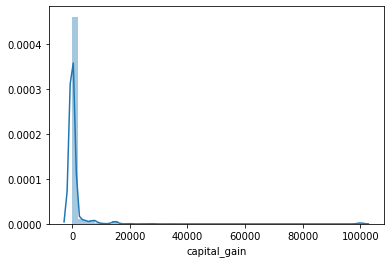

In [9]:
# Let's look for some outliers for our numeric data
sns.distplot(df['capital_gain']);

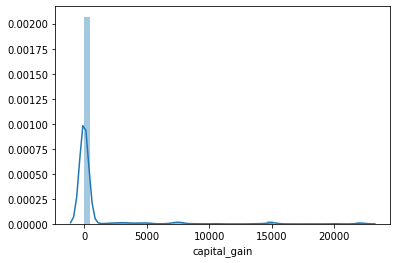

In [10]:
# Looks like there's some huge values in capital gains... must be nice.
# Let's take those folks down a bit to 3x std. dev to "handle numeric outliers"
sd_3x = 3*df['capital_gain'].std()
lst = np.array(df['capital_gain'].values.tolist())
df['capital_gain'] = np.where(lst > sd_3x, sd_3x, lst).tolist()

sns.distplot(df['capital_gain']);

In [11]:
# If there's no missing numeric data, we shouldn't have to replace any...
ints = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for i in ints:
    print(df[i].isna().sum())

0
0
0
0
0


In [12]:
# we'll normalize the capital_loss column for the excercise
# I'm doing min/max normalization... because why not?
df['capital_loss'] = (df['capital_loss'] - df['capital_loss'].min()) / (df['capital_loss'].max() - df['capital_loss'].min())

In [13]:
# Bin a numeric variable
# Age is a great candidate for this...
bins = [0, 18, 24, 34, 44, 54, 64, np.inf]
names = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins, labels=names)
df['age_group'].value_counts()

25-34    8479
35-44    8151
45-54    5853
18-24    4625
55-64    3172
65+      1336
<18       945
Name: age_group, dtype: int64

In [14]:
# Consolidate categorical variables
# native country is begging for this...
# use a dictionary to make a mapping...
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
m = {"North America":['United-States', 'Canada', 'Outlying-US(Guam-USVI-etc)'],
     "Central/South America": ['Mexico','El-Salvador', 'Dominican-Republic', 'Guatemala', 'Columbia', 'Nicaragua', 'Peru', 'Ecuador', 'Honduras'],
     "Carribean":['Puerto-Rico', 'Cuba', 'Jamacia', 'Hati', 'Trinadad&Tobago'],
     "Europe": ['Germany','England', 'Italy', 'Poland', 'Portugal', 'Greece', 'France', 'Ireland', 'Yugoslavia', 'Scotland', 'Holand-Netherlands'], 
     "Asia": ['Philippines', 'India', 'China', 'Vietnam', 'Japan', 'Taiwan', 'Hong', 'Hong Kong', 'Cambodia', 'Laos', 'Thailand'],
     "Middle East": ['Iran'],
     "Unknown": ['South']
     }
m2 = {v: k for k,vv in m.items() for v in vv}

# make sure there's no junk in the native_country column
df['native_country'] = df['native_country'].str.strip()
# map the values
df['native_country_group'] = df['native_country'].map(m2)
df['native_country_group'].value_counts()

North America            29888
Central/South America     1048
Asia                       628
Europe                     508
Carribean                  228
Unknown                     80
Middle East                 43
Name: native_country_group, dtype: int64

In [27]:
# one hot encode a column with at least 3 values
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race_', dummy_na=True)],axis=1).drop(['race'], axis=1)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,...,native_country,income,age_group,native_country_group,race__ Amer-Indian-Eskimo,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,race__nan
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,...,United-States,<=50K,35-44,North America,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0.0,0.0,...,United-States,<=50K,45-54,North America,0,0,0,0,1,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,...,United-States,<=50K,35-44,North America,0,0,0,0,1,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,0.0,...,United-States,<=50K,45-54,North America,0,0,1,0,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0.0,0.0,...,Cuba,<=50K,25-34,Carribean,0,0,1,0,0,0


### Summary

- Read in the data from UCI
- Replaced numeric outliers with a sensible max (3x standard deviations for `capital_gains`)
- Checked for missing numerical data (there is none)
- Normalized `capital_loss`
- Binned `age` into `age_group`
- Consolidated `native_country` into a geographical grouping `native_country_group`
- One hot encoded `race`
- Removed the `fnlwgt` column, which is useless for my purposes
